<a href="https://colab.research.google.com/github/sejuti-falgunii/Electroencephalography/blob/main/EEG_Signal_Analysis_with_ICA_and_Epoching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Installing libraries, mounting drive, paths, loading data to MNE, plotting raw data

In [108]:
!pip install mne
!pip install pyedflib
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import shutil
rec_path = "/content/drive/MyDrive/EEG/sleep-edf-database-1.0.0/sleep-edf-database-1.0.0/sc4112e0.rec"
edf_path = "/content/drive/MyDrive/EEG/sleep-edf-database-1.0.0/sleep-edf-database-1.0.0/sc4112e0.edf"
shutil.copy(rec_path, edf_path)

'/content/drive/MyDrive/EEG/sleep-edf-database-1.0.0/sleep-edf-database-1.0.0/sc4112e0.edf'

In [110]:
import mne
raw = mne.io.read_raw_edf(edf_path, preload=True)
print(raw.info)

Extracting EDF parameters from /content/drive/MyDrive/EEG/sleep-edf-database-1.0.0/sleep-edf-database-1.0.0/sc4112e0.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8339999  =      0.000 ... 83399.990 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-05-02 15:20:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: X, sex: 1, last_name: X>
>


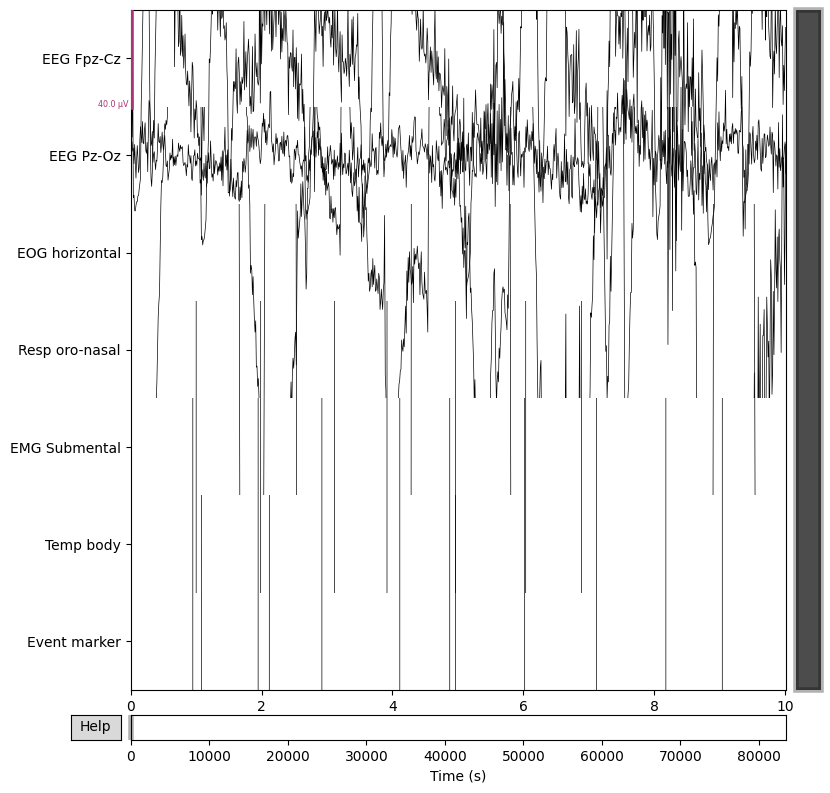

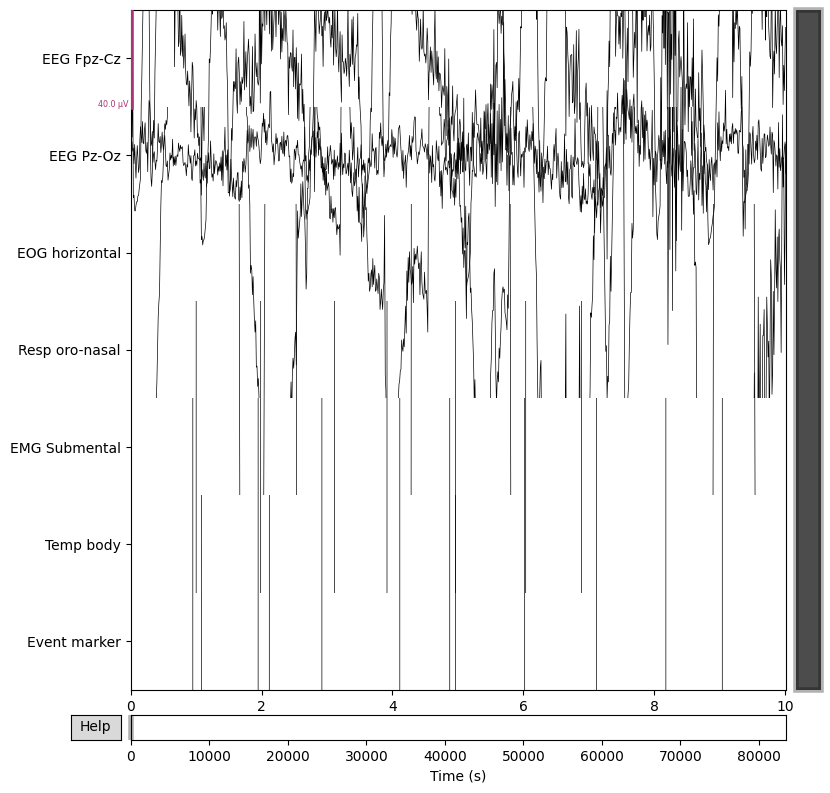

In [112]:
raw.plot(duration=10, n_channels=20)

##### Applying a bandpass filter to the data between 1 and 40 Hz to remove unwanted noise.

In [113]:
raw.filter(l_freq=1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (3.310 s)



<RawEDF | sc4112e0.edf, 7 x 8340000 (83400.0 s), ~445.4 MiB, data loaded>

##### Applying Independent Component Analysis (ICA) to remove artifacts from the EEG data.

In [114]:
ica = mne.preprocessing.ICA(n_components=3, random_state=97, max_iter=800)
ica.fit(raw)

Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 3 components
Fitting ICA took 35.0s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=800
Fit,10 iterations on raw data (8340000 samples)
ICA components,3
Available PCA components,7
Channel types,eeg
ICA components marked for exclusion,—


##### Finally, plotting the raw data again, this time including the 'Event marker' channel.

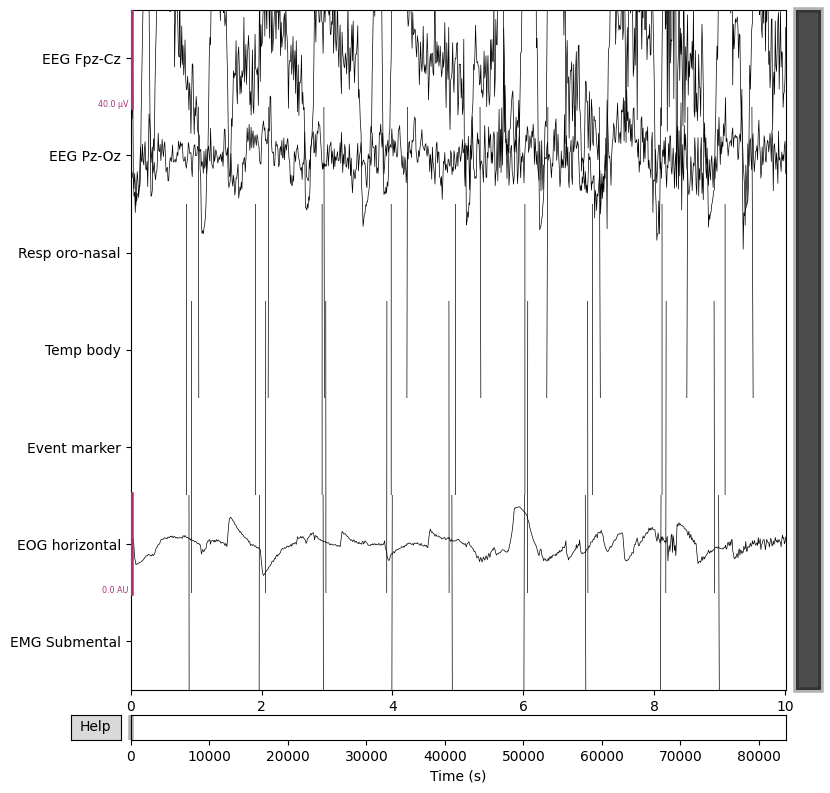

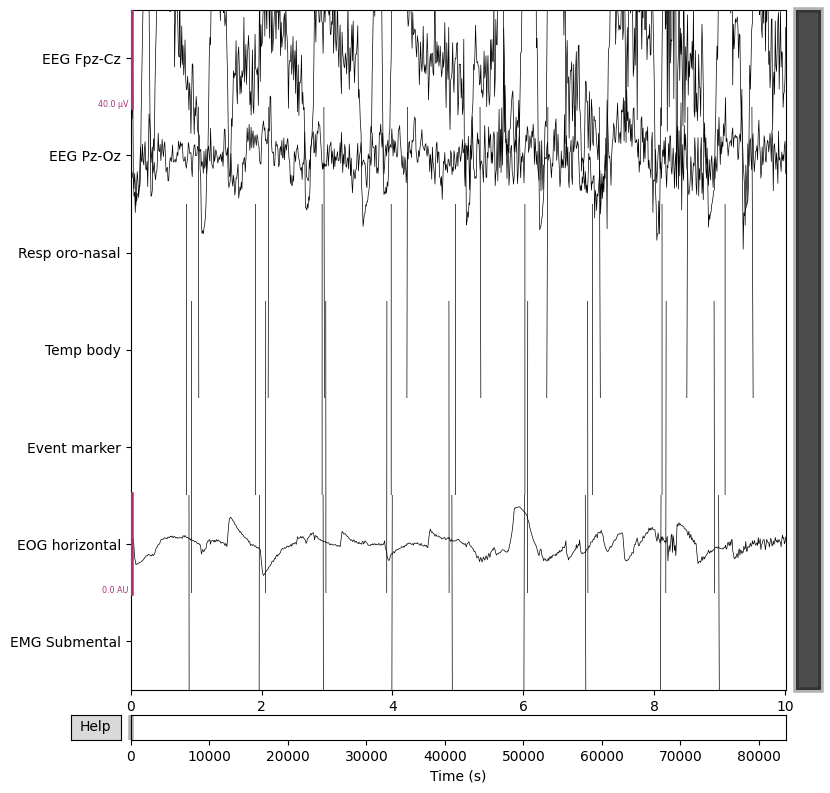

In [141]:
raw.plot()

##### Creating events and epochs, and visualize the epochs for further analysis.

Not setting metadata
3 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3 events and 71 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 3 events and 71 original time points ...


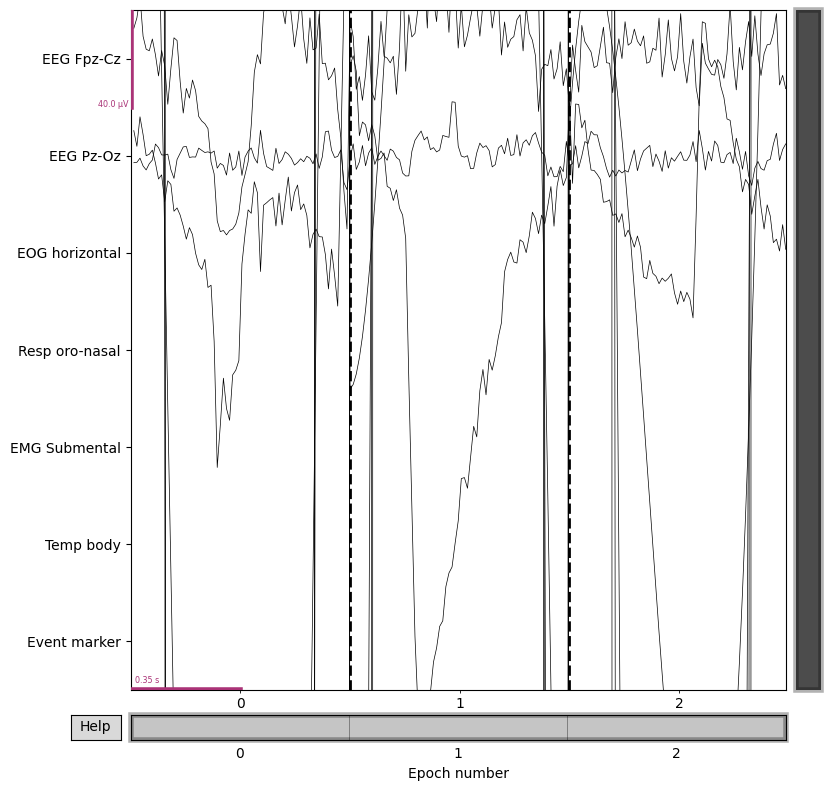

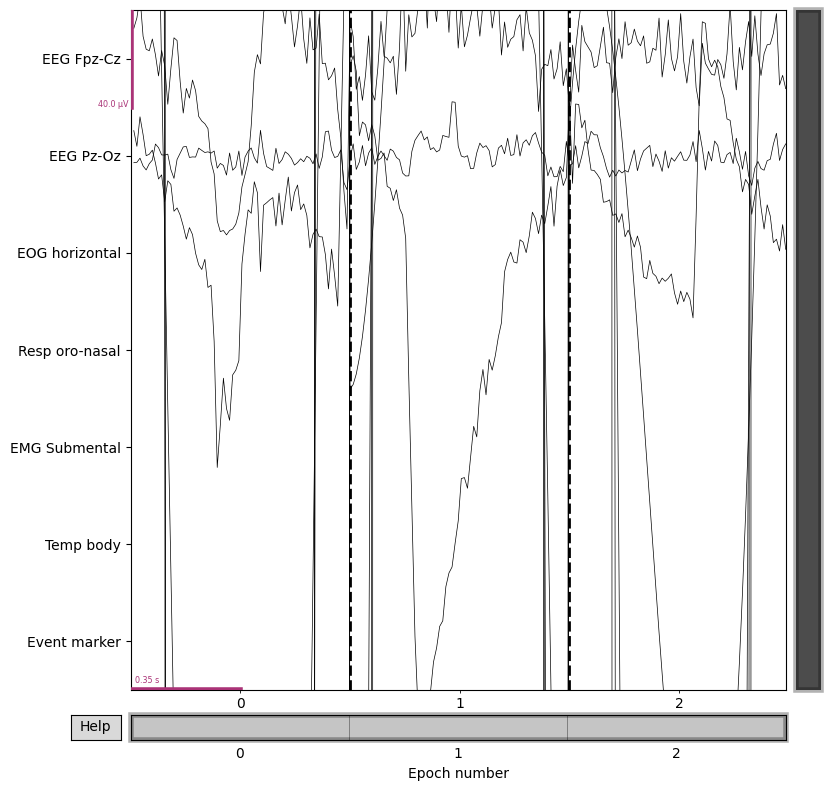

In [115]:
events = np.array([[100, 0, 1], [200, 0, 2], [300, 0, 3]])  # Example events
event_id = {'stimulus_1': 1, 'stimulus_2': 2, 'stimulus_3': 3}
epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5, baseline=(None, 0), detrend=1)
epochs.plot()

##### Setting non-EEG channels to 'misc' and apply the montage to the EEG data.

Using data from preloaded Raw for 3 events and 201 original time points ...
Applying baseline correction (mode: logratio)


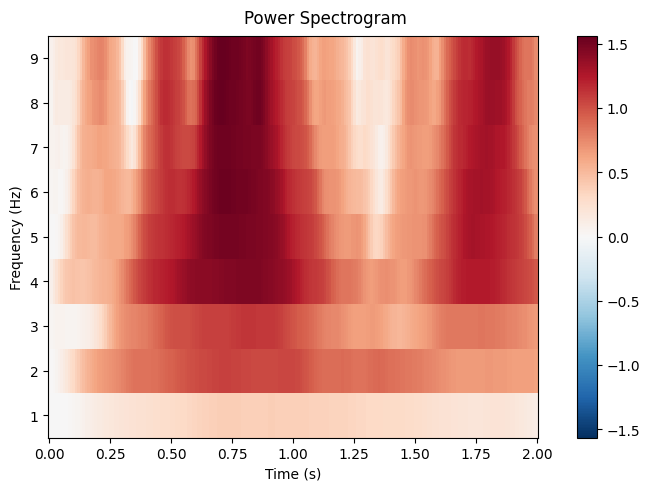

[<Figure size 640x480 with 2 Axes>]

In [134]:
power = epochs.compute_tfr(method="multitaper", freqs=np.arange(1, 10, 1), n_cycles=2, return_itc=False)
power_single_epoch = power.average().pick(0)
power_single_epoch.plot(baseline=(-0.5, 0), mode='logratio', title="Power Spectrogram", show=True)


Applying baseline correction (mode: logratio)


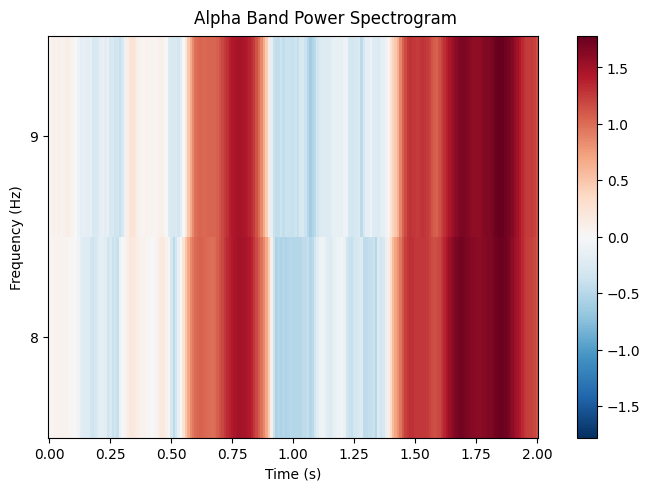

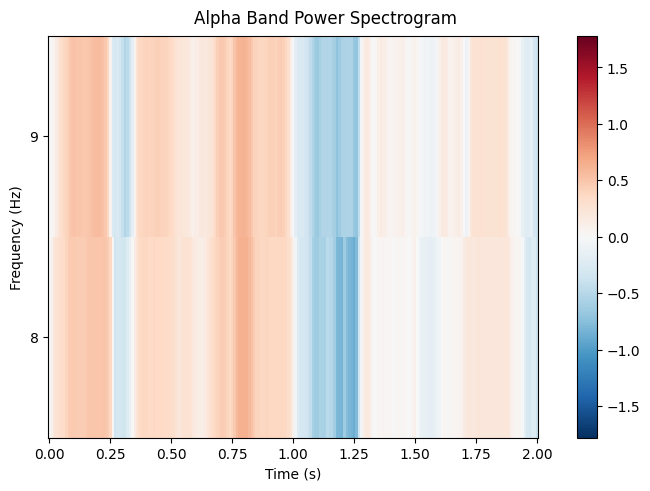

[<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 2 Axes>]

In [135]:
power_band[0].plot(baseline=(-0.5, 0), mode='logratio', title="Alpha Band Power Spectrogram", show=True)


Applying baseline correction (mode: logratio)


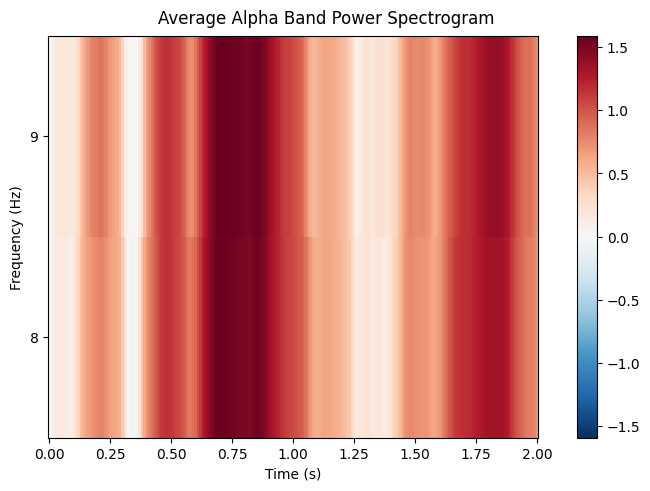

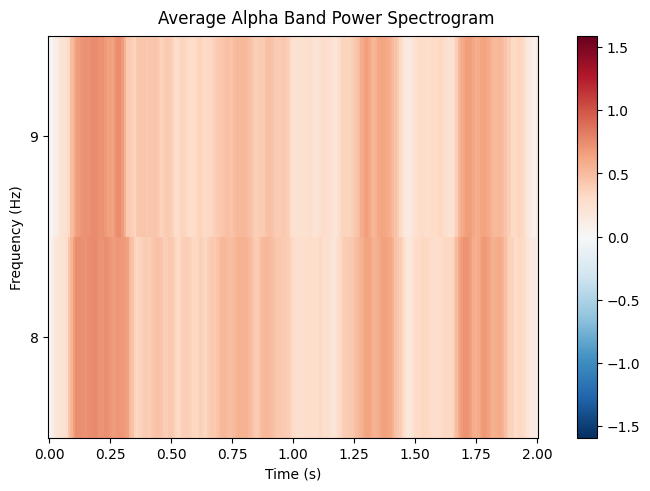

[<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 2 Axes>]

In [139]:
power_band.average().plot(baseline=(-0.5, 0), mode='logratio', title="Average Alpha Band Power Spectrogram", show=True)
